Coursera Google Advanced Data Analytics

Course 5 Regression Analysis Simplify Complex Data Relationships

Module 2 Simple linear regression

Explore linear regression with Python

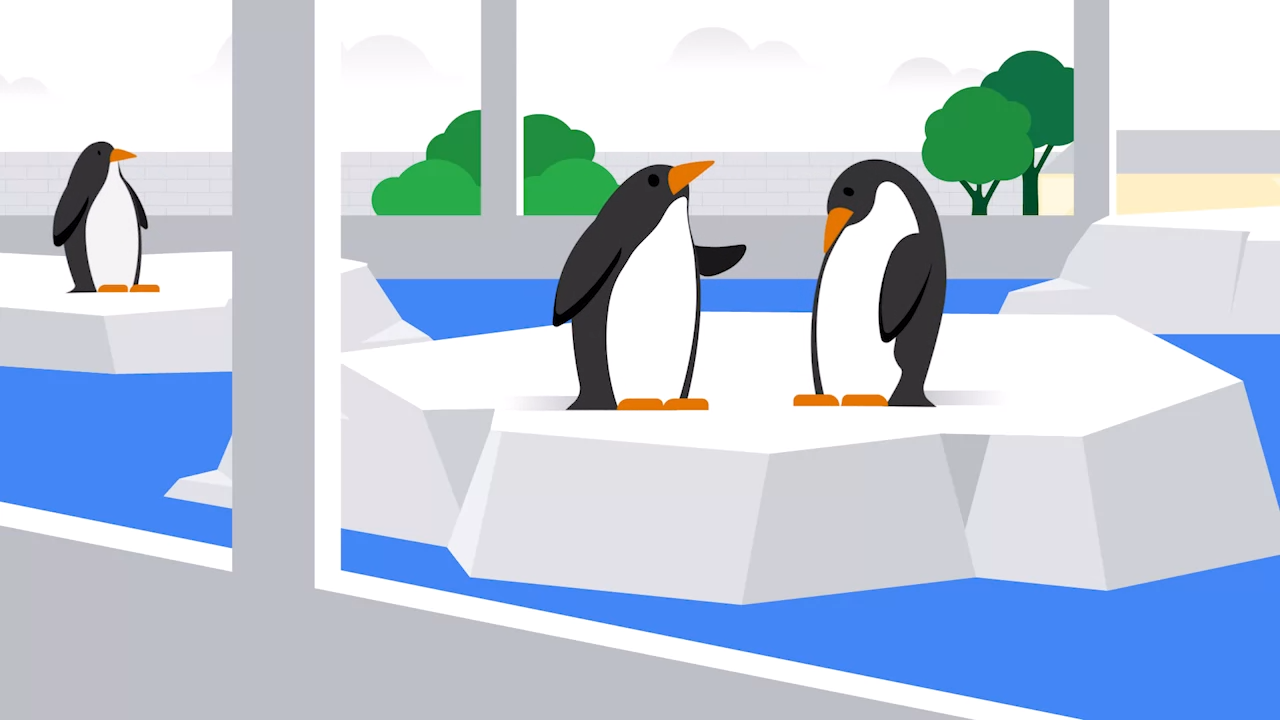

Image from Google Advanced Data Analytics

The caretakers who manage the penguin habitats are having trouble keeping their population adequately fed. They're hoping to find out if certain features of the birds are related to body mass to better manage their feeding routines.

In [ ]:
# Import packages
import pandas as pd
import seaborn as sns

# Load dataset
penguins = sns.load_dataset("penguins")

# Examine first 5 rows of dataset
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [ ]:
# Subset just Chinstrap penguins from data set
chinstrap_penguins = penguins[penguins["species"] == "Chinstrap"]
chinstrap_penguins = chinstrap_penguins.dropna()

# Reset index of dataframe
chinstrap_penguins.reset_index(inplace = True, drop = True)

The diagonal displays the distribution of the continuous variables. This assures you that the data has met the linearity assumption for building a simple linear regression.

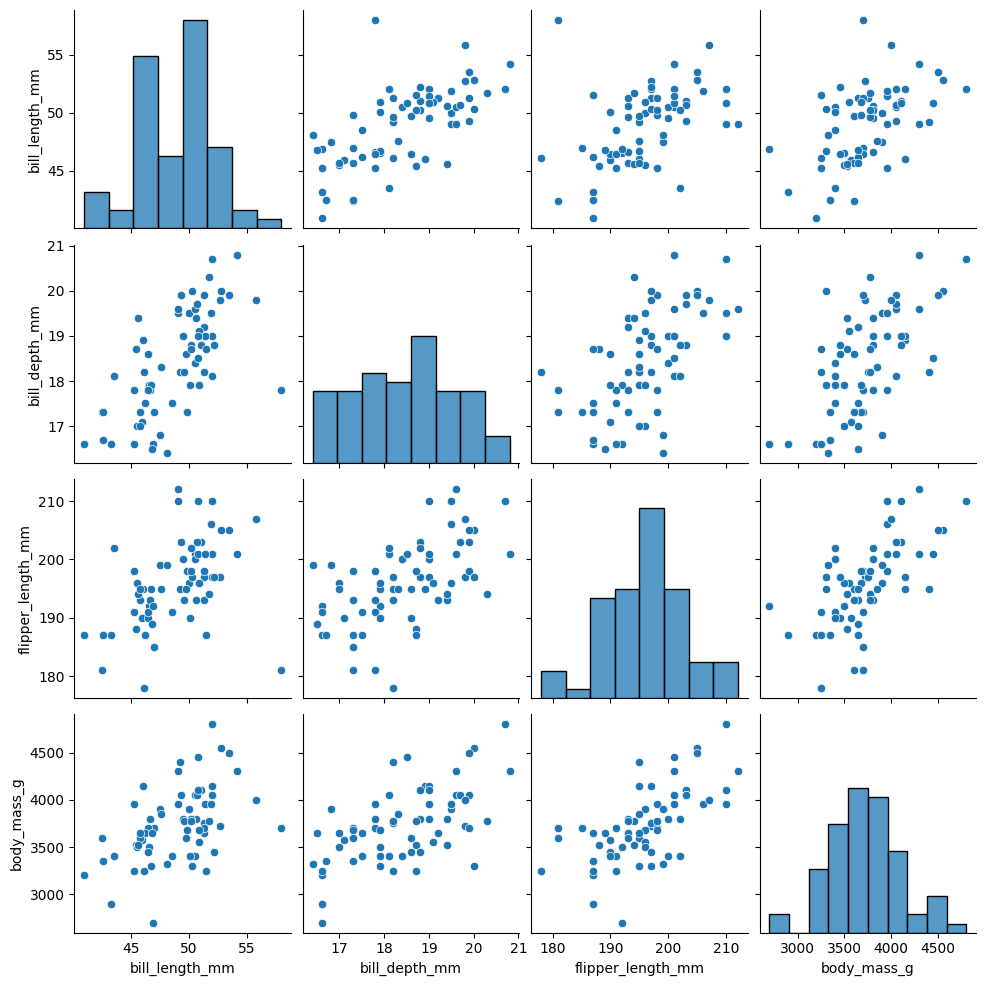

In [ ]:
sns.pairplot(chinstrap_penguins)

First, bill length and body mass seem to be positively correlated. Next, flipper length and bill length also seem to be positively correlated. Lastly, body mass and flipper length also seem to be correlated.

In [ ]:
# Subset Data
ols_data = chinstrap_penguins[["flipper_length_mm", "body_mass_g"]]

$y$ $=$ $intercept$ $+$ $slope$ * $x$

$y$ $=$ $\beta_0$ $+$ $\beta_1$$X$

`body_mass_g` $=$ $\beta_0$ $+$ $\beta_1$ * `flipper_length_mm`

In [ ]:
# Write out formula
ols_formula = "body_mass_g ~ flipper_length_mm"

In [ ]:
# Import ols function
from statsmodels.formula.api import ols

In [ ]:
# Build OLS, fit model to data
OLS = ols(formula = ols_formula, data = ols_data)
model = OLS.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.412
Model:                            OLS   Adj. R-squared:                  0.403
Method:                 Least Squares   F-statistic:                     46.17
Date:                Tue, 26 Nov 2024   Prob (F-statistic):           3.75e-09
Time:                        17:44:34   Log-Likelihood:                -482.66
No. Observations:                  68   AIC:                             969.3
Df Residuals:                      66   BIC:                             973.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -3037.1958    997.054     -3.046      0.003   -5027.878   -1046.514
flipper_length_mm    34.5734      5.088      6.795      0.000      24.414      44.732
==============================================================================
Omnibus:                        1.839   Durbin-Watson:                   2.573
Prob(Omnibus):                  0.399   Jarque-Bera (JB):                1.142
Skew:                          -0.152   Prob(JB):                        0.565
Kurtosis:                       3.557   Cond. No.                     5.42e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.42e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

${R}^2$ $=$ $1-$$\frac{Sum　of　squared　residuals}{Total　sum　of　squares}$

In [ ]:
predictions = model.predict(chinstrap_penguins[["flipper_length_mm"]])
predictions

,0
0,3600.895847
1,3739.189422
2,3635.469241
3,3462.602272
4,3773.762816
...,...
63,4119.496755
64,3946.629786
65,3635.469241
66,4223.216937


In [ ]:
# Subset X variable
x = ols_data["flipper_length_mm"]

# Get predictions from model
fitted_values = model.predict(x)

In [ ]:
# Calculate residuals
residuals = model.resid

<Axes: xlabel='flipper_length_mm', ylabel='body_mass_g'>

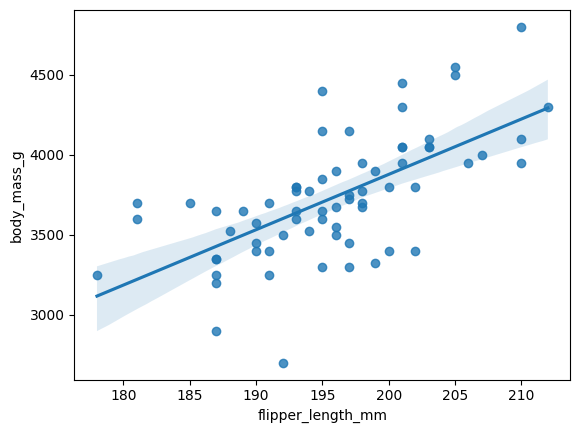

In [ ]:
sns.regplot(x = "flipper_length_mm", y = "body_mass_g", data = ols_data)

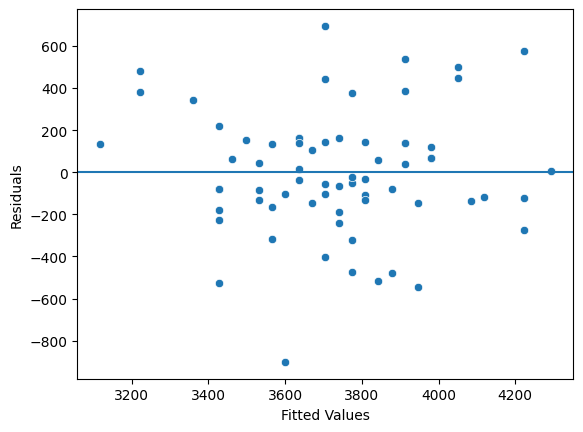

In [ ]:
import matplotlib.pyplot as plt
fig = sns.scatterplot(x=fitted_values, y=residuals)
fig.axhline(0)
fig.set_xlabel("Fitted Values")
fig.set_ylabel("Residuals")
plt.show()

Returning to the linear regression assumptions create a scatter plot of the fitted values against the residuals. This is a very common plot when working with linear regression to check various assumptions. From this plot, residuals seem randomly space, which assume homoscedasticity.

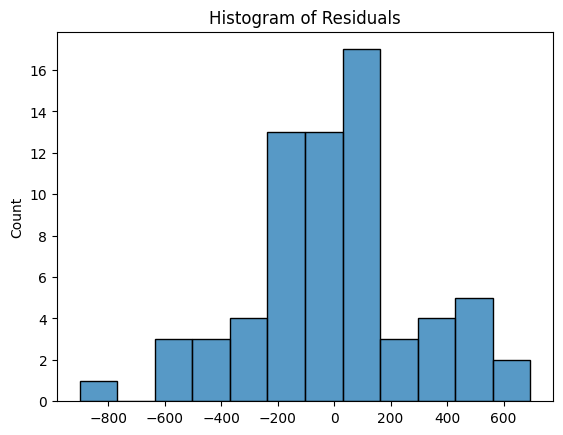

In [ ]:
fig = sns.histplot(residuals)
fig.set_label("Residual Value")
fig.set_title("Histogram of Residuals")
plt.show()

If the residuals are normally distributed following that classic bell curve shape, then the normality assumption has been met as well. Because the residuals are a little bit skewed in the histogram, a QQ plot to verify normality.

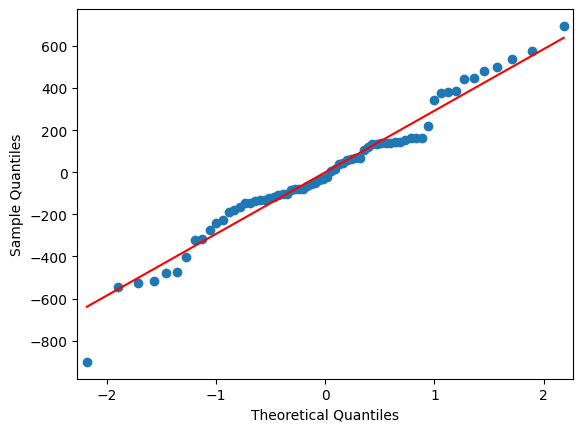

In [ ]:
import statsmodels.api as sm
fig = sm.qqplot(model.resid, line = 's')
plt.show()

There is a straight diagonal line trending upward with some slight curvature on the extremes. Since all the assumptions are met, the results from the regression model are likely reasonable.